# Word2Vec

In [18]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.test.utils import datapath
from gensim.utils import simple_preprocess
from gensim import utils
import gensim.models
from gensim.models import Word2Vec

# Plotting
import matplotlib
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

%matplotlib inline

In [19]:
data = pd.read_csv('2013-2018.csv', error_bad_lines=False);

# Only keeping rows with dutch remarks
data = data.loc[data['Taal'] == 'nl']

data['Opmerking']= data['Opmerking'].astype(str)
data.info()

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))] for doc in texts]

data_words = remove_stopwords(data['Opmerking'])

data_words[:1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27617 entries, 0 to 32481
Data columns (total 9 columns):
Unnamed: 0        27617 non-null int64
Brin              27617 non-null object
Croho             27617 non-null object
CrohoNo           10437 non-null float64
Jaar              27617 non-null int64
OpleidingsVorm    23728 non-null object
Opmerking         27617 non-null object
Taal              27617 non-null object
Degree            27617 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 2.1+ MB


[['het',
  'lesrooster',
  'was',
  'de',
  'vorige',
  'perioden',
  'veel',
  'beter',
  'toen',
  'hadden',
  'we',
  'elke',
  'week',
  'wel',
  'een',
  'dag',
  'vrij',
  'waardoor',
  'je',
  'goed',
  'aan',
  'je',
  'studie',
  'kan',
  'werken',
  'want',
  'als',
  'je',
  'maar',
  'tot',
  'uur',
  'hoeft',
  'ben',
  'ik',
  'nog',
  'laat',
  'thuis',
  'ivm',
  'reizen']]

In [3]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
corpus = [id2word.doc2bow(text) for text in data_words]

print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1)]]


In [4]:
model = Word2Vec(data_words, min_count=1 ,size= 50 ,workers=3, window =3, sg = 1)

C:\Users\Tobias\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [5]:
model['stage']

C:\Users\Tobias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.3307161 , -0.10102399, -0.64414394,  0.38333538,  0.12932374,
        0.1945633 , -0.48470896,  0.48581228, -0.04703853,  1.0558615 ,
       -0.64436626, -0.91581076,  0.09768706,  0.0781554 ,  0.5998558 ,
        0.08748943, -0.34020177,  0.4683386 ,  0.04462569,  0.217053  ,
       -0.11140938,  0.7515922 ,  0.15617307,  0.25663692, -0.48488665,
        0.16926451,  0.76689464,  0.05385099, -1.3523968 ,  0.03618876,
        0.77721804,  0.14315045,  0.01086889,  0.15894552,  0.2996709 ,
        0.09343361,  0.02553587, -0.46270323, -0.8345194 ,  0.6178356 ,
        0.62347233,  0.9634369 , -0.11568329, -0.644973  , -0.00286518,
        0.19904034,  0.14177763,  0.01036095,  0.50598437, -0.6682206 ],
      dtype=float32)

In [6]:
model.similarity('stage', 'docent')

C:\Users\Tobias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.53383976

In [7]:
model.similarity('stage', 'stagebegeleider')

C:\Users\Tobias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.7927888

In [8]:
model.similarity('docent', 'parkeren')

C:\Users\Tobias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.55326205

In [9]:
model.similarity('parkeren', 'auto')

C:\Users\Tobias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.87847686

C:\Users\Tobias\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """
C:\Users\Tobias\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\Tobias\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


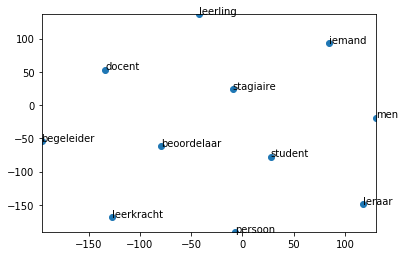

In [22]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show() 
    
display_closestwords_tsnescatterplot(model, 'student', 50) 

C:\Users\Tobias\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """
C:\Users\Tobias\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\Tobias\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


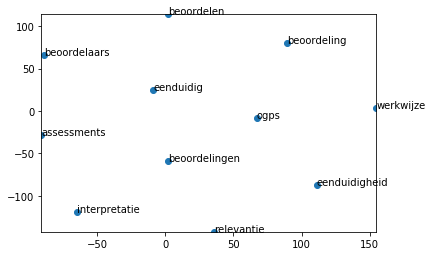

In [24]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show() 
    
display_closestwords_tsnescatterplot(model, 'beoordeling', 50) 